# Red Wine Quality Prediction Model

Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

**Attribute Information:**

Input variables (based on physicochemical tests):

1 - fixed acidity 

2 - volatile acidity 

3 - citric acid 

4 - residual sugar

5 - chlorides 

6 - free sulfur dioxide 

7 - total sulfur dioxide

8 - density 

9 - pH 

10 - sulphates 

11 - alcohol 

Output variable (based on sensory data): 

12 - quality (score between 0 and 10) 

In [156]:
from google.colab import drive

In [157]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Getting Started

In [158]:
#Importing the python libraries and packages

import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

In [159]:
#Reading the CSV file of the dataset
#Pandas read_csv() function imports a CSV file (in our case, 'winequality-red.csv’) to DataFrame format.

df = pd.read_csv('/content/drive/MyDrive/Python_Datasets/winequality-red.csv')

In [160]:
#Examining the Data
#After importing the data, to learn more about the dataset, we’ll use .head() .info() and .describe() methods
df.head()

fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0            7.4              0.70         0.00  ...       0.56      9.4        5
1            7.8              0.88         0.00  ...       0.68      9.8        5
2            7.8              0.76         0.04  ...       0.65      9.8        5
3           11.2              0.28         0.56  ...       0.58      9.8        6
4            7.4              0.70         0.00  ...       0.56      9.4        5

[5 rows x 12 columns]

In [161]:
#The .info() method will give you a concise summary of the DataFrame.

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


**Observation** : We have float type value in all independent variables and quality is our target variable in which we have classes

In [162]:
#The shape of the dataset

df.shape

(1599, 12)

**Observation** : This shows that our dataset contains 1599 rows i.e. instances of red-wine and 23 columns i.e. the specifications like volatile acid,citric acid,chlorides ,pH, density, etc.

In [163]:
df.describe()

fixed acidity  volatile acidity  ...      alcohol      quality
count    1599.000000       1599.000000  ...  1599.000000  1599.000000
mean        8.319637          0.527821  ...    10.422983     5.636023
std         1.741096          0.179060  ...     1.065668     0.807569
min         4.600000          0.120000  ...     8.400000     3.000000
25%         7.100000          0.390000  ...     9.500000     5.000000
50%         7.900000          0.520000  ...    10.200000     6.000000
75%         9.200000          0.640000  ...    11.100000     6.000000
max        15.900000          1.580000  ...    14.900000     8.000000

[8 rows x 12 columns]

In [164]:
#Unique occurrences of ‘class’ column

df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

**Observation** : As we can see, there are 6 unique values in the ‘quality’ column of the dataset. But there is an arbitrary cutoff for our dependent variable (wine quality) at  7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.

In [165]:
#Count of the unique occurrences of ‘class’ column

df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [166]:
def plot(feature_x,target='quality'):
    sns.factorplot(x=target,y=feature_x,data=df,kind='bar',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='violin',size=5,aspect=1)
    sns.factorplot(x=target,y=feature_x,data=df,kind='swarm',size=5,aspect=1)

In [167]:
#Good_Quality_Wine(1)

199+18

217

In [168]:
#Not_Good_Quality_Wine(0)
681+638+53+10

1382

**Observation** : As we can see, there are 217 occurrences of Good quality wine and 1382 occurrences of Not good quality wine in the dataset.

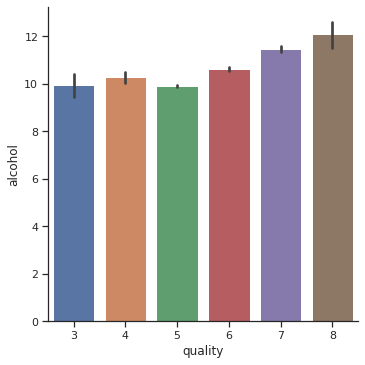

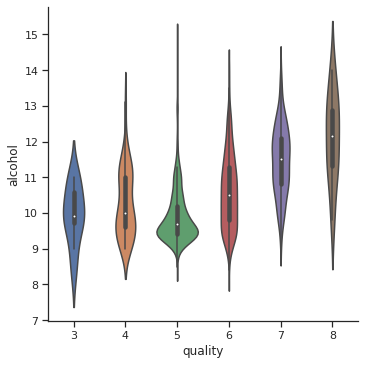

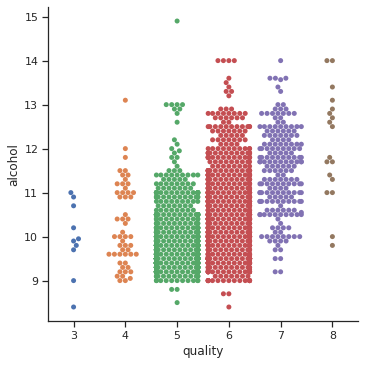

In [169]:
# for fixed acidity.
plot('alcohol','quality')

**Observation** : Above 3 plots concludes different wine with their respective quality .

In [170]:
# #Making binary classificaion for the response variable.

from sklearn.preprocessing import LabelEncoder
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
df['quality'] = label_quality.fit_transform(df['quality'])
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

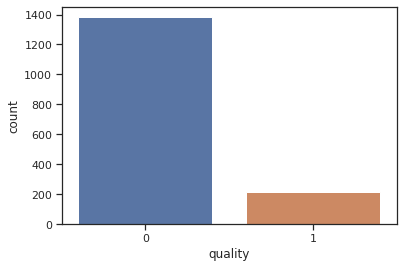

In [171]:
#plotting the response variable
sns.countplot(df['quality'])

Observation : Its a class imbalance problem which will be solved later .

In [172]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

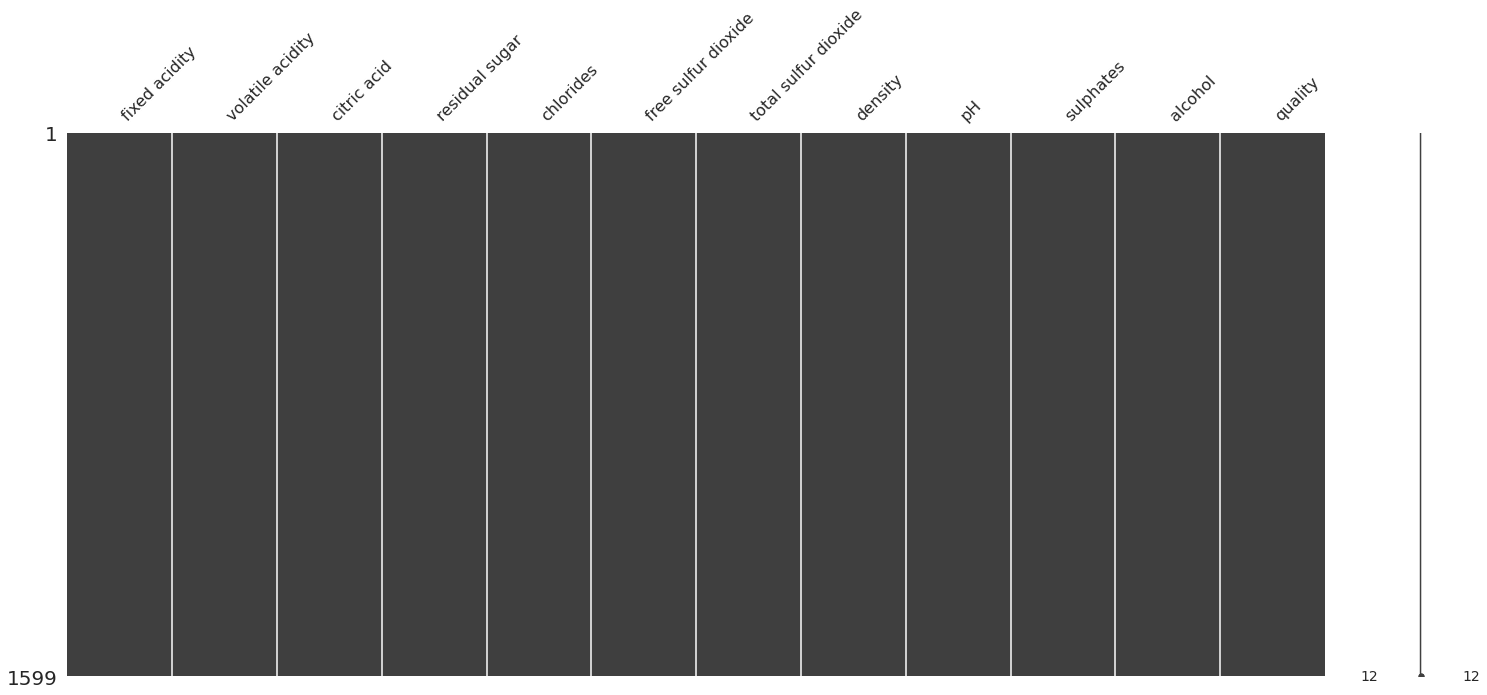

In [173]:
# just to visualize. no missing values.

import missingno as msno
msno.matrix(df)

**Observation** : No Null Values present . Its a clean dataset

# **EDA (Exploratory Data Analysis)**

Univariate Analysis

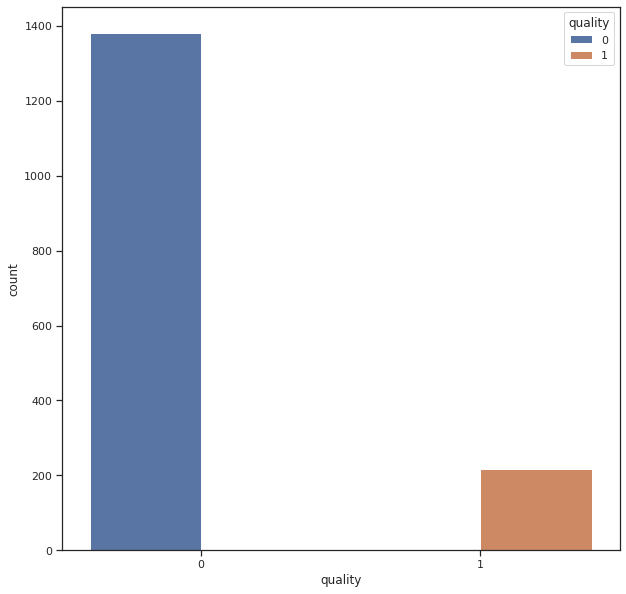

In [174]:
plt.figure(figsize=(10,10))
sns.countplot(x='quality', data=df , hue="quality",saturation=0.75 )
plt.show()

Observation : Clearly presence of Class imbalance problem which needed to be delt with .

In [175]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

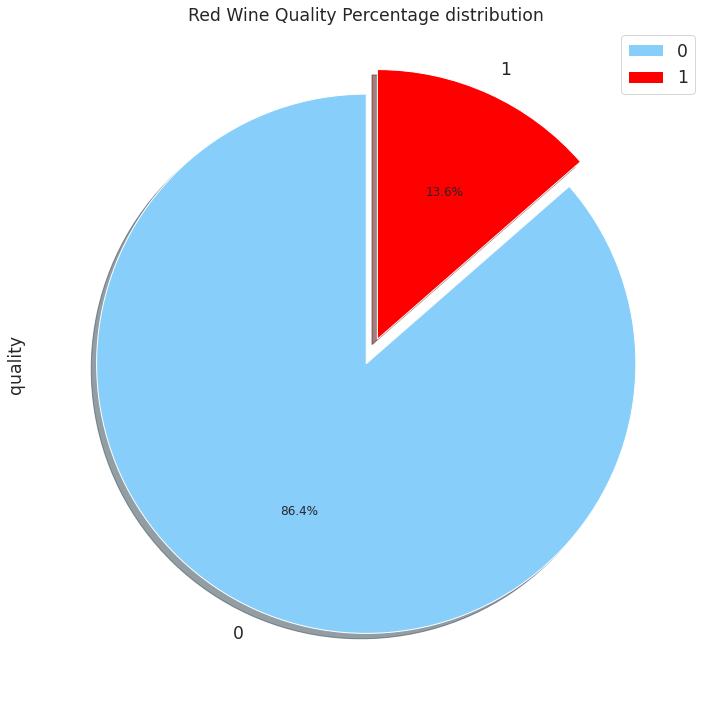

In [176]:
f, ax = plt.subplots(figsize=(15, 10))
order = list(df['quality'].value_counts().index)

#pop_labels = ['3','4','5','6','7','8']
colors = ['lightskyblue', 'red', 'blue', 'green', 'gold','violet']
explode = (0,0.1)
df['quality'].value_counts().plot.pie(explode=explode , colors = colors ,startangle=90 ,autopct='%.1f%%',shadow=True, ax=ax)
ax.set_title('Red Wine Quality Percentage distribution');
ax.legend(loc = "upper right") 
plt.tight_layout() 
plt.show()

**Observation** : From the above pie-chart , it shows that we have maximum quantity of red-wine with not good quality .

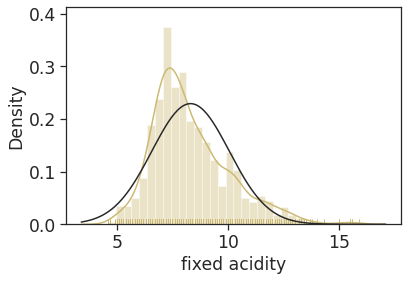

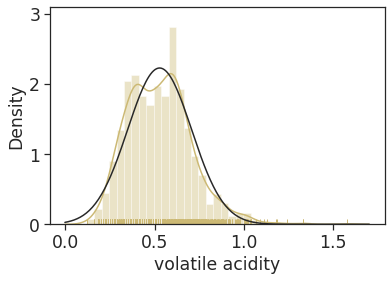

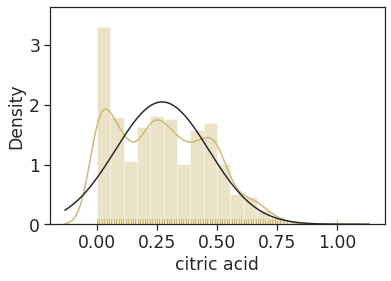

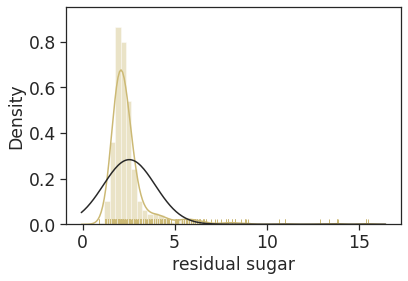

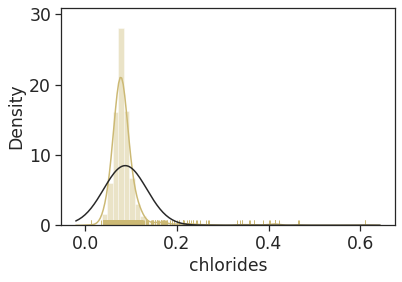

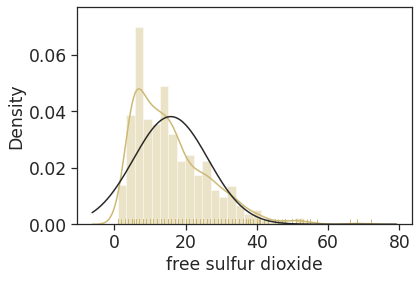

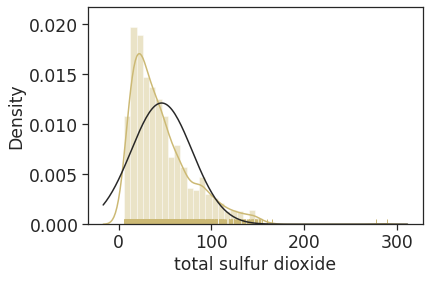

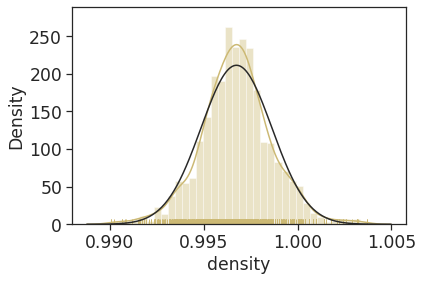

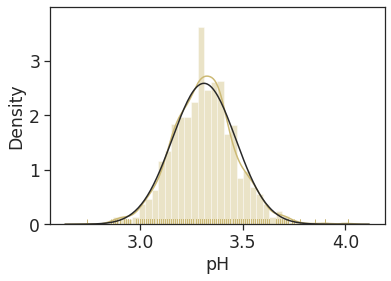

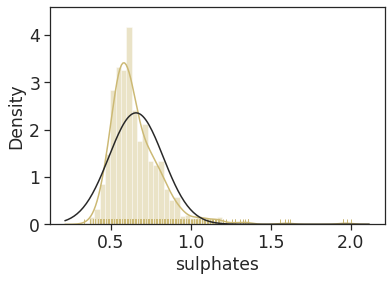

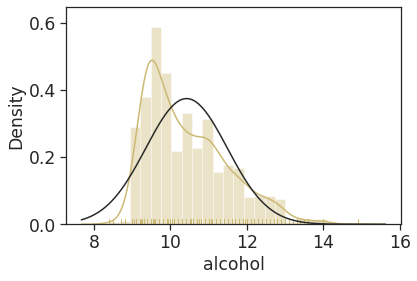

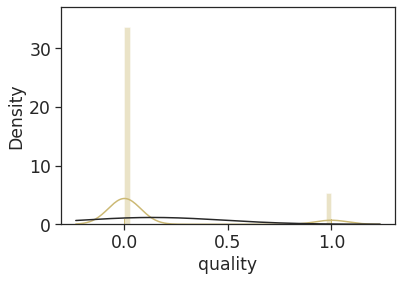

In [177]:
# Making of distplot to show the skewness in different columns

from scipy.stats import norm
for g in df.describe().columns:
    sns.distplot(df[g] , rug=True , color = 'y' , fit=norm)
    plt.show()

Observation : It looks like many of the specifications of wine are very close to normal distribution except few which needed to be normaly distributed .

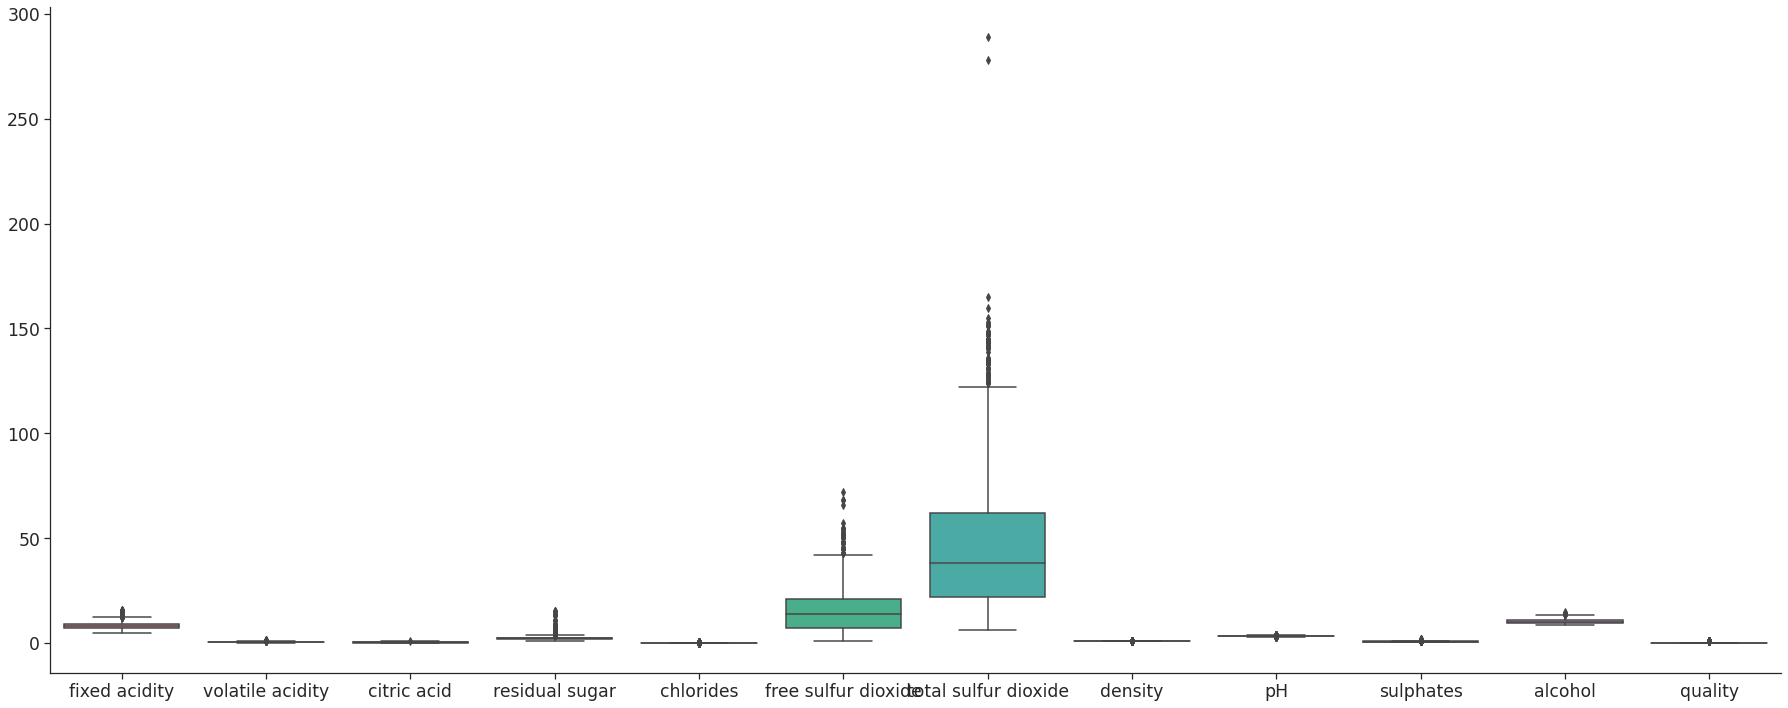

In [178]:
#fixed acidity.
sns.factorplot(data=df,kind='box',size=10,aspect=2.5) # 

**Observation** : The values are distributed over a very small scale.

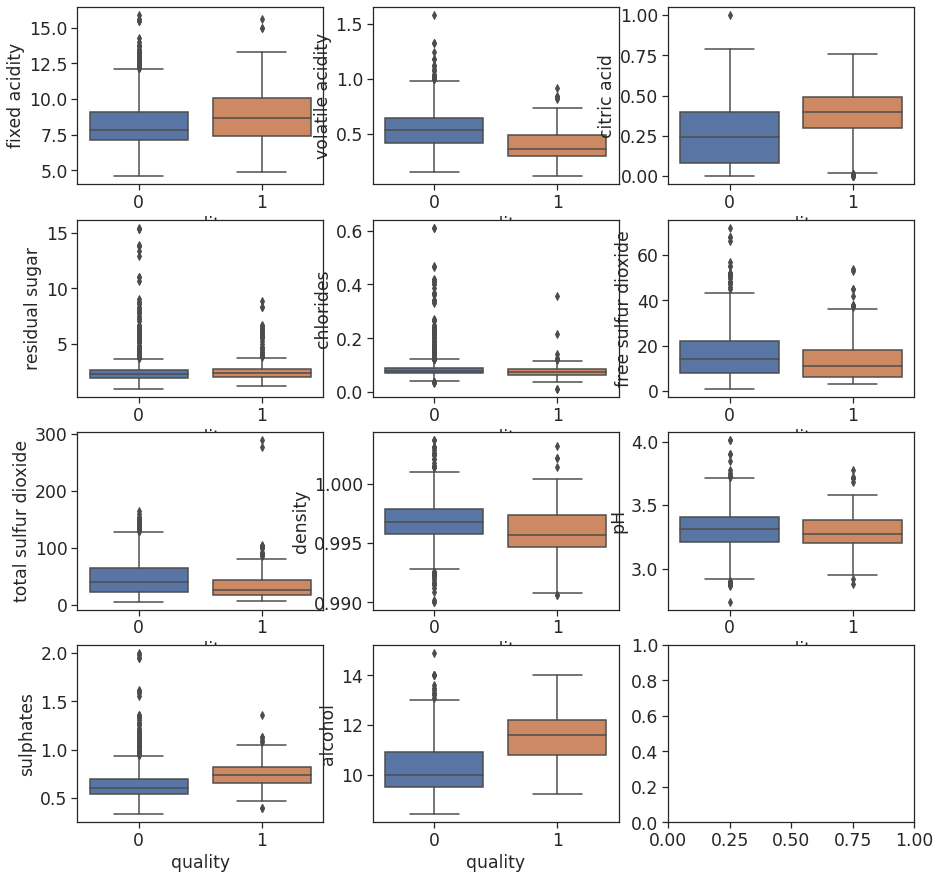

In [179]:
# Features distribution over quality's possible values
fig, ax = plt.subplots(4, 3, figsize=(15, 15))
for var, subplot in zip(df.columns, ax.flatten()):
    if var == "quality":
        continue
    else:
        sns.boxplot(x=df['quality'], y=df[var], data=df, ax=subplot)

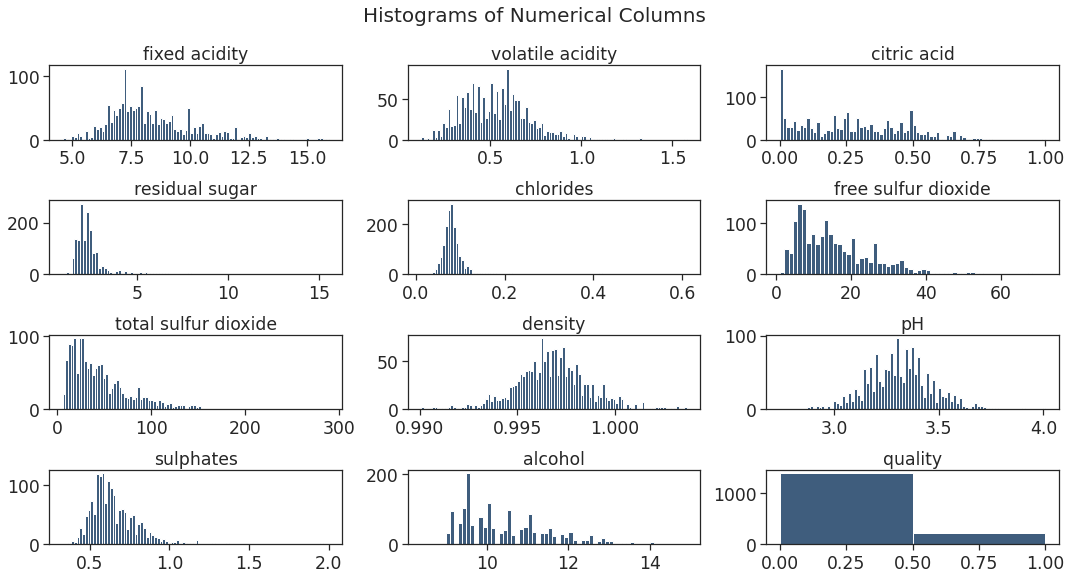

In [180]:
## Histograms
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(df.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(df.columns.values[i])

    vals = np.size(df.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(df.iloc[:, i], bins=vals, color='#3F5D7D')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

**Observation** : Based on the 2 plots above, we can conclude that compared with poor quality level, excellent quality level has higher proportion of high alcohol wine; on average, higher level the wine quality, lower the volatile acidity and higher the citric acid.

**Bivariate **Analysis**

Text(0.5, 1.0, 'fixed acidity and quality')

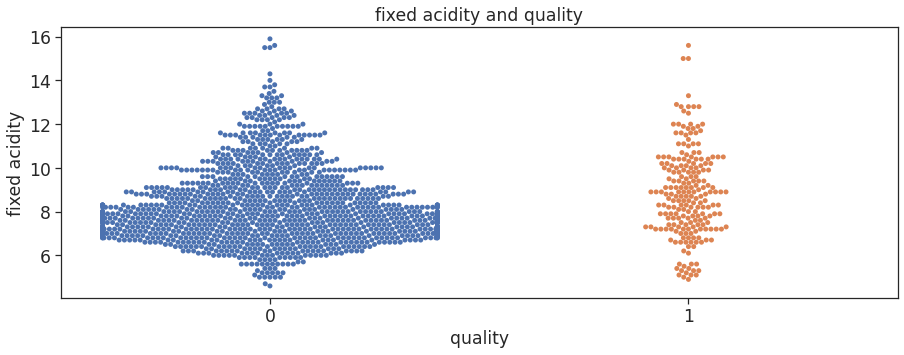

In [181]:
plt.figure(figsize=(15,5))
sns.swarmplot(x= "quality", y="fixed acidity" , data = df) 
plt.title('fixed acidity and quality')

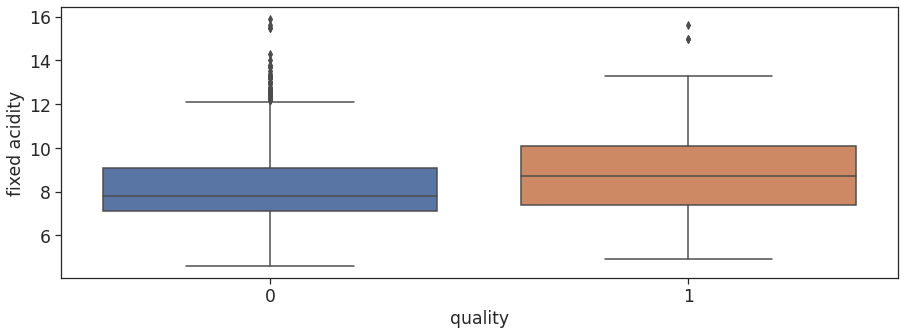

In [182]:
plt.figure(figsize=(15,5))
sns.boxplot(x="quality", y="fixed acidity",   data = df )

Text(0, 0.5, 'fixed acidity')

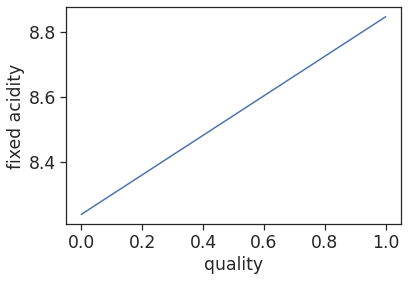

In [183]:
df.groupby('quality')['fixed acidity'].mean().plot.line()
plt.ylabel("fixed acidity")

Relations between volatile acidity and quality

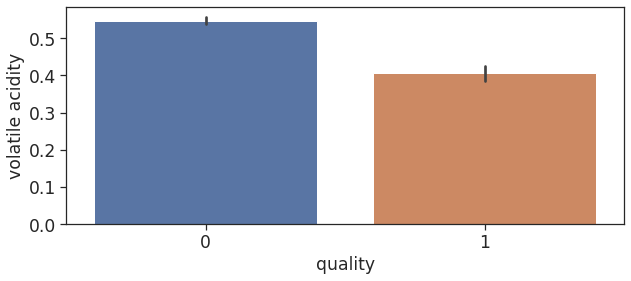

In [184]:
plt.figure(figsize=(10,4))
sns.barplot(x="quality", y="volatile acidity",   data=df )

Text(0, 0.5, 'volatile acidity')

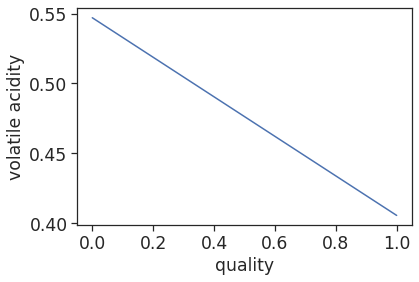

In [185]:
df.groupby('quality')['volatile acidity'].mean().plot.line()
plt.ylabel("volatile acidity")

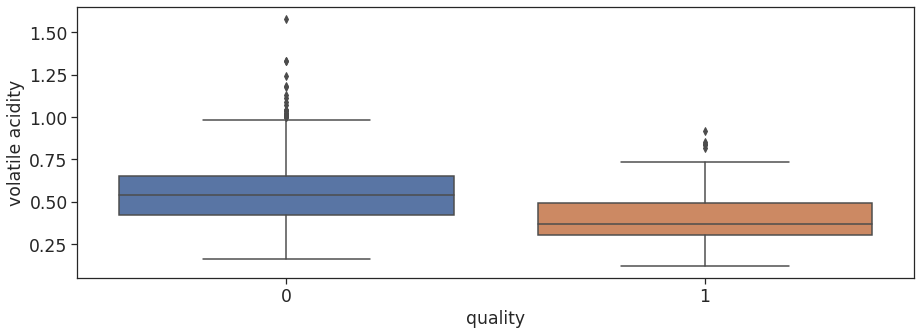

In [186]:
plt.figure(figsize=(15,5))
sns.boxplot(x="quality", y="volatile acidity",   data=df )

Relation between quality and sulphates

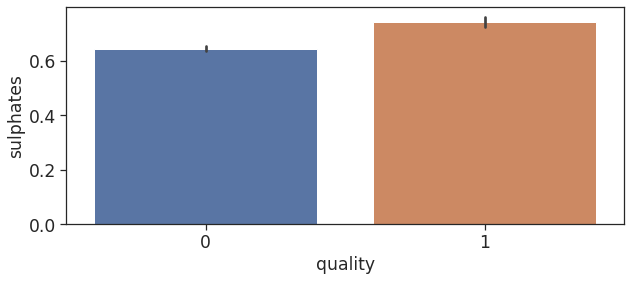

In [187]:
plt.figure(figsize=(10,4))
sns.barplot(x="quality", y="sulphates",   data=df )

Text(0, 0.5, 'sulphates')

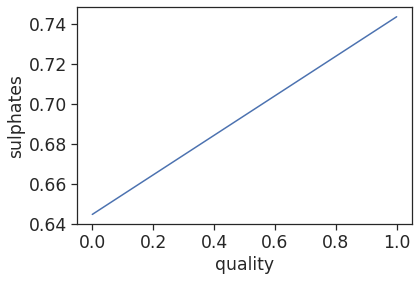

In [188]:
df.groupby('quality')['sulphates'].mean().plot.line()
plt.ylabel("sulphates")

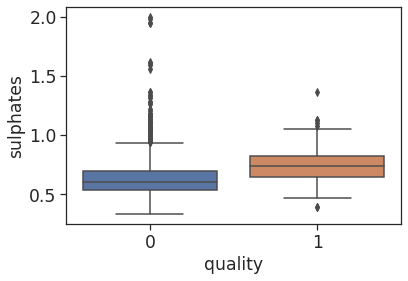

In [189]:
sns.boxplot(x="quality", y="sulphates",   data=df )

Realtion between quality and pH

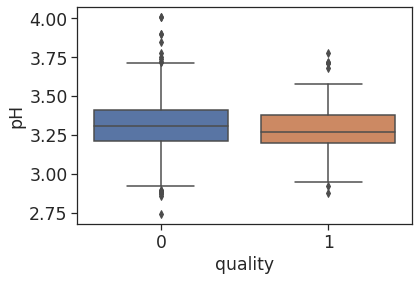

In [190]:
sns.boxplot(x="quality", y="pH",   data=df )

Text(0, 0.5, 'pH')

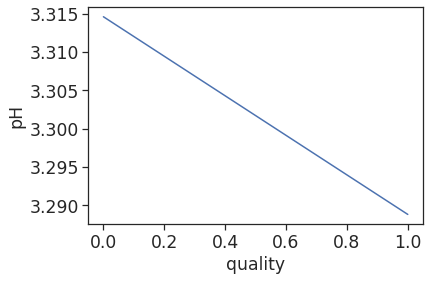

In [191]:
df.groupby('quality')['pH'].mean().plot.line()
plt.ylabel("pH")

Realtion between fixed acidity and pH

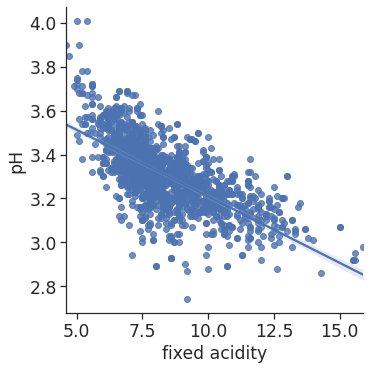

In [192]:
sns.lmplot(x="fixed acidity", y="pH", data=df)

Realtion between fixed acidity and citric acid

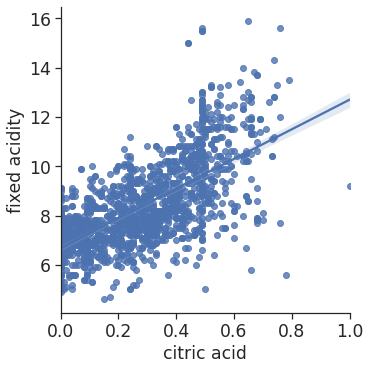

In [193]:
sns.lmplot(y="fixed acidity", x="citric acid", data=df)

**Observation** : Looks like there are few outliers present are to be removed later .

**Multivariate** **Analysis**

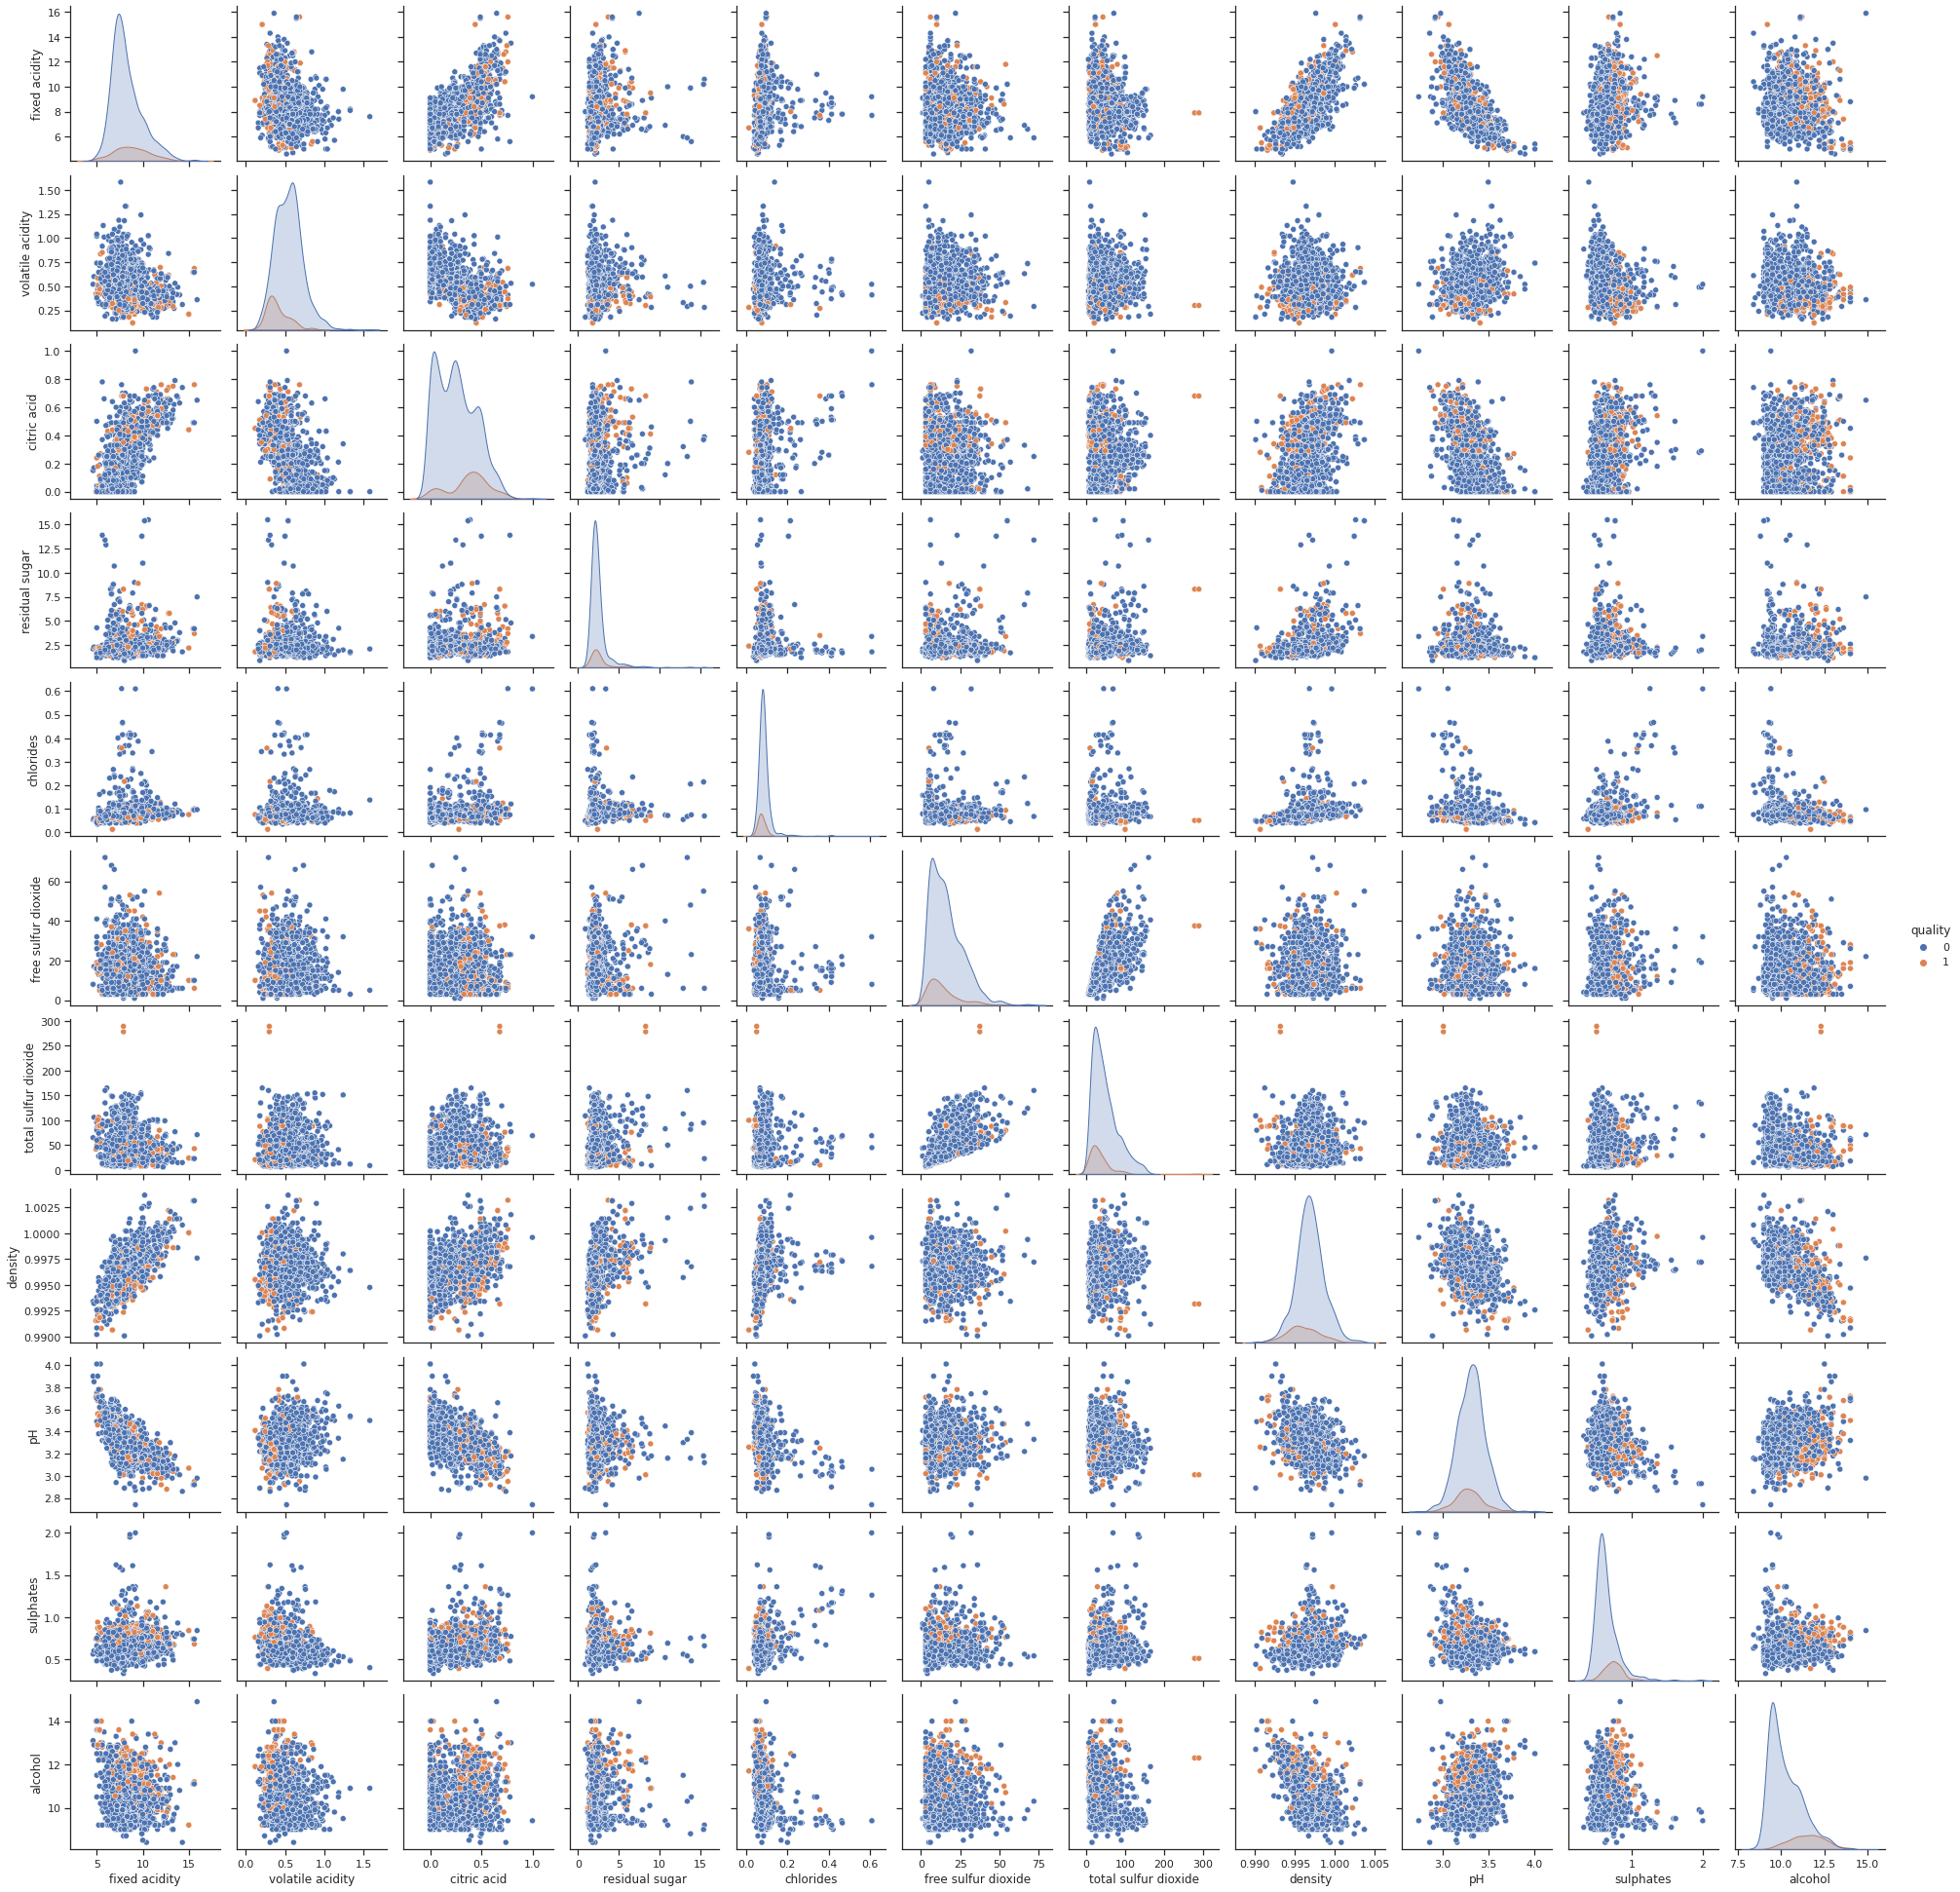

In [194]:
sns.set(style="ticks")
sns.pairplot(df,hue="quality")

**Observation** : According to the pairplot above, "volatile acidity" and "citric acid" are two variables whose distributions are rather distinguishable among three-level quality.

Checking Correlation between Variables

In [195]:
cor=df.corr()

In [196]:
cor

fixed acidity  volatile acidity  ...   alcohol   quality
fixed acidity              1.000000         -0.256131  ... -0.061668  0.120061
volatile acidity          -0.256131          1.000000  ... -0.202288 -0.270712
citric acid                0.671703         -0.552496  ...  0.109903  0.214716
residual sugar             0.114777          0.001918  ...  0.042075  0.047779
chlorides                  0.093705          0.061298  ... -0.221141 -0.097308
free sulfur dioxide       -0.153794         -0.010504  ... -0.069408 -0.071747
total sulfur dioxide      -0.113181          0.076470  ... -0.205654 -0.139517
density                    0.668047          0.022026  ... -0.496180 -0.150460
pH                        -0.682978          0.234937  ...  0.205633 -0.057283
sulphates                  0.183006         -0.260987  ...  0.093595  0.199485
alcohol                   -0.061668         -0.202288  ...  1.000000  0.407315
quality                    0.120061         -0.270712  ...  0.407315  1.000000

[12 rows x 12 columns]

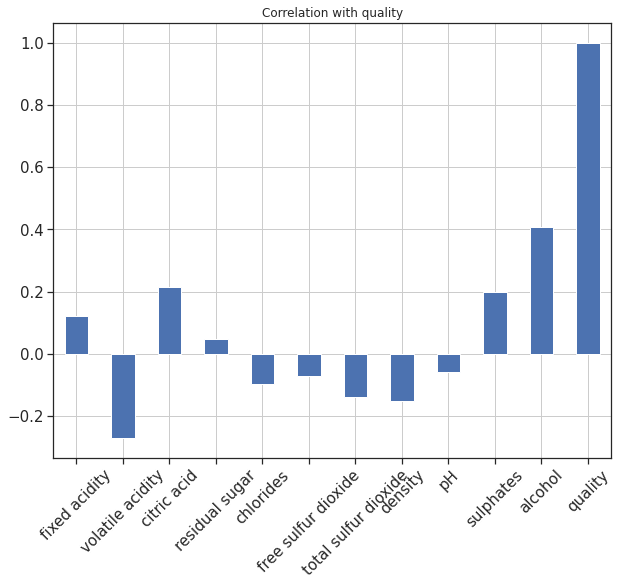

In [197]:
#Correlation with Quality with respect to attributes
df.corrwith(df.quality).plot.bar(
        figsize = (10, 8), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)

Plotting Heatmap

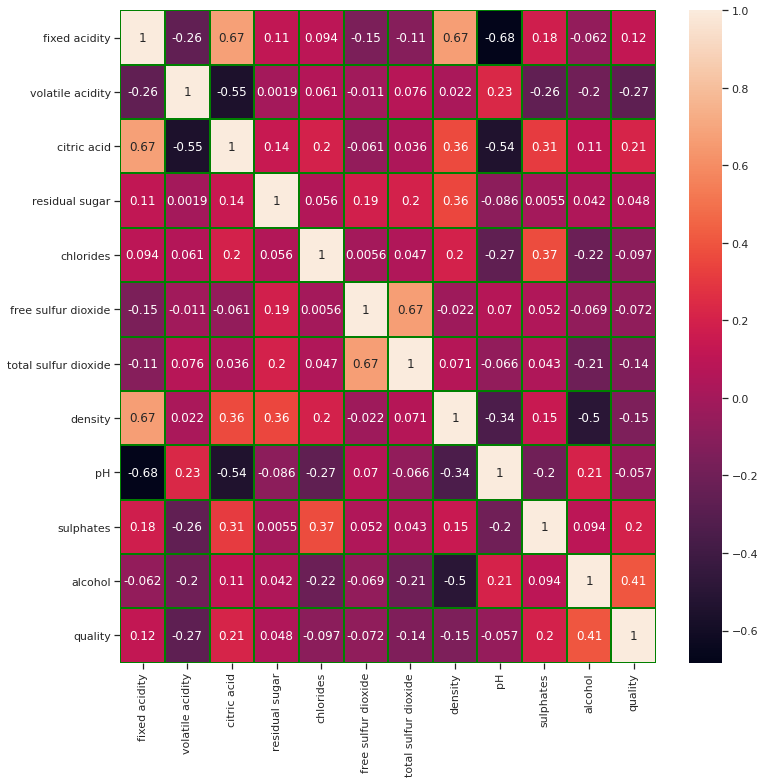

In [198]:
plt.figure(figsize=(12,12))
sns.heatmap(cor,annot=True,linewidths=1,linecolor='green')
plt.show()

**Observation** : Based on the heatmap above, except for "residual sugar", 'free sulfur dioxide' and 'pH', other variables seem to have some relationships with “quality”.

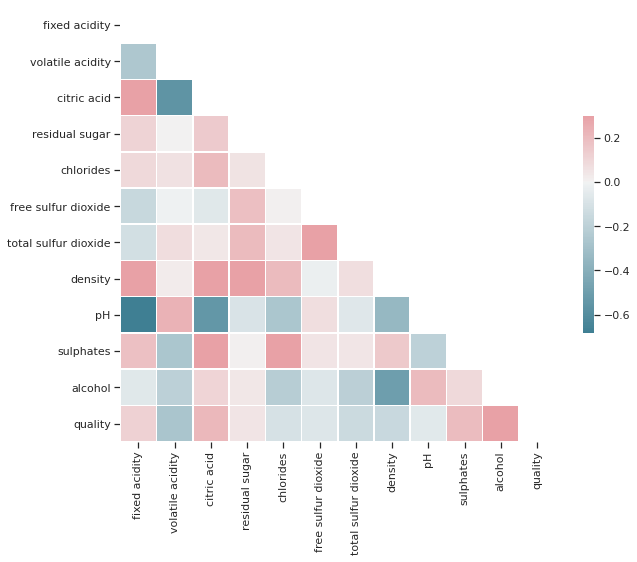

In [199]:
# Generate a mask for the upper triangle
mask = np.zeros_like(cor, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(10, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(cor, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Data Cleaning

1.Checking Null Values

In [200]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

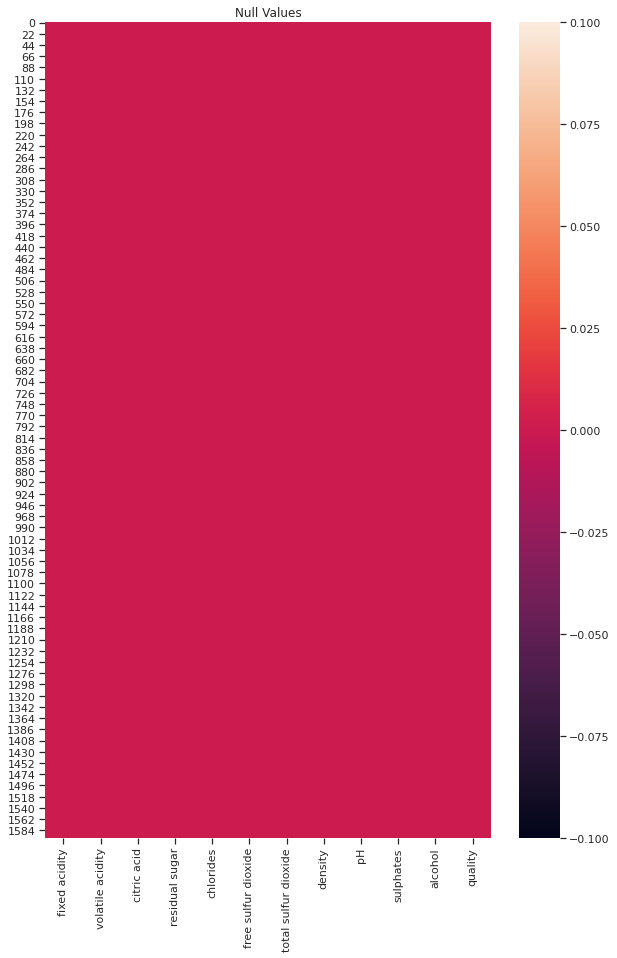

In [201]:
#Plotting Null Values
plt.figure(figsize=[10,15])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

Observation : This is a very clean dataset because there are no null values present in the dataset

2.Checking for Outliers

In [202]:
#Compute Outliers using zscore method

from scipy.stats import zscore

z=np.abs(zscore(df))


new_df=df [(z<3).all(axis=1)]

In [203]:
df.shape

(1599, 12)

In [204]:
new_df.shape

(1458, 12)

In [205]:
#Count Number of Outliers

df.shape[0]-new_df.shape[0]

141

In [206]:
(141/1599)*100

8.818011257035648

Observation :There will be a loss of 8.81% of data from the dataset which could be acceptable . 

3.Checking for Skewness

In [207]:
new_df.skew()

fixed acidity           0.820879
volatile acidity        0.392097
citric acid             0.292600
residual sugar          2.450707
chlorides               2.307274
free sulfur dioxide     0.869727
total sulfur dioxide    1.185230
density                 0.055543
pH                      0.113039
sulphates               0.893297
alcohol                 0.757396
quality                 2.103030
dtype: float64

Observation : There are a number of variables where skewness has to be reduced . Lets perform it

In [208]:
new_df['fixed acidity'] = np.log(new_df['fixed acidity'])

In [209]:
new_df['residual sugar'] = np.log(new_df['residual sugar'])

In [210]:
new_df['chlorides'] = np.log(new_df['chlorides'])

In [211]:
new_df['free sulfur dioxide'] = np.sqrt(df['free sulfur dioxide'])

In [212]:
new_df['total sulfur dioxide'] = np.cbrt(df['total sulfur dioxide'])

In [213]:
new_df['sulphates'] = np.log(df['sulphates'])

In [214]:
new_df['alcohol'] = np.sqrt(df['alcohol'])

In [220]:
new_df['quality'] = np.cbrt(df['quality'])

In [222]:
new_df.skew()

fixed acidity           0.377100
volatile acidity        0.392097
citric acid             0.292600
residual sugar          1.229070
chlorides               0.528828
free sulfur dioxide     0.321688
total sulfur dioxide    0.343010
density                 0.055543
pH                      0.113039
sulphates               0.345344
alcohol                 0.671764
quality                 2.103030
dtype: float64

Observation : Now the dataset looks skewed and ready to go.

# Split Data and Target

In [223]:
#Preparing the Data
#Setting X and y-axis .
#Since we want to predict the class of the mushroom, we will drop the ‘class’ column.
from sklearn.model_selection import train_test_split

X = new_df.drop(['quality'], axis=1)
y = new_df["quality"]

In [224]:
y.head

<bound method NDFrame.head of 0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1594    0.0
1595    0.0
1596    0.0
1597    0.0
1598    0.0
Name: quality, Length: 1458, dtype: float64>

Using SMOTE for handling imbalanced data which uses under sampling method tomek with an over sampling method SMOTE to handle imbalanced data

In [225]:
from imblearn.over_sampling import SMOTE
SM = SMOTE()
X_res,y_res = SM.fit_resample(X,y)

In [226]:
X_res.shape

(2514, 11)

In [227]:
y_res.shape

(2514,)

In [228]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

# Preparation of Test and Train Data

The final process here is the smooth and random separation of test and train data. For this, we will benefit from the method named "train_testsplit" from the Scikit-Learn library. I would like to use 20% of our data for testing and 80% for training purposes. The process is very simple:

In [229]:
from sklearn.model_selection import train_test_split  # Import "train_test_split" method

X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.2, random_state=42)
# Parameters:
# test_size : It decides how many test data in percentage.
# random_state : This parameter can take any value. This value decides randomness seed.

In [230]:
#Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(X, y)
features_label = df.columns[:11]
importances = classifier.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(X.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) fixed acidity                  0.181129
 2) volatile acidity               0.137738
 3) citric acid                    0.103809
 4) residual sugar                 0.094374
 5) chlorides                      0.086458
 6) free sulfur dioxide            0.082406
 7) total sulfur dioxide           0.069730
 8) density                        0.067570
 9) pH                             0.061997
10) sulphates                      0.058249
11) alcohol                        0.056539


Feature Importances

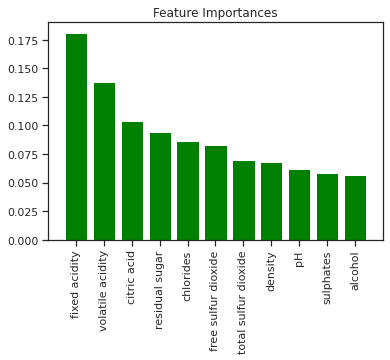

In [231]:
plt.title('Feature Importances')
plt.bar(range(X.shape[1]),importances[indices], color="green", align="center")
plt.xticks(range(X.shape[1]),features_label, rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()

# Classification Methods

In [232]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC,SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score 

from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [233]:
models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
model_names=['LogisticRegression','LinearSVM','rbfSVM','KNearestNeighbors','RandomForestClassifier','DecisionTree',
             'GradientBoostingClassifier','GaussianNB']

acc=[]
d={}

for model in range(len(models)):
    clf=models[model]
    clf.fit(X_train,y_train)
    pred=clf.predict(X_test)
    acc.append(accuracy_score(pred,y_test))
     
d={'Modelling Algo':model_names,'Accuracy':acc}
d

{'Accuracy': [0.8071570576540755,
  0.8091451292246521,
  0.8250497017892644,
  0.8846918489065606,
  0.9542743538767395,
  0.8926441351888668,
  0.8926441351888668,
  0.8210735586481114],
 'Modelling Algo': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB']}

In [234]:
acc_frame=pd.DataFrame(d)
acc_frame

Modelling Algo  Accuracy
0          LogisticRegression  0.807157
1                   LinearSVM  0.809145
2                      rbfSVM  0.825050
3           KNearestNeighbors  0.884692
4      RandomForestClassifier  0.954274
5                DecisionTree  0.892644
6  GradientBoostingClassifier  0.892644
7                  GaussianNB  0.821074

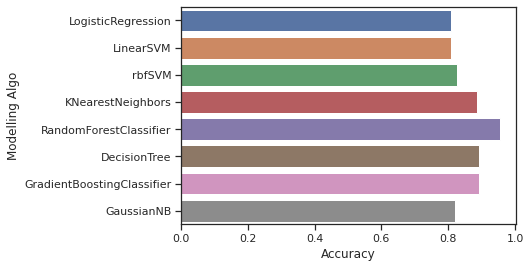

In [235]:
sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

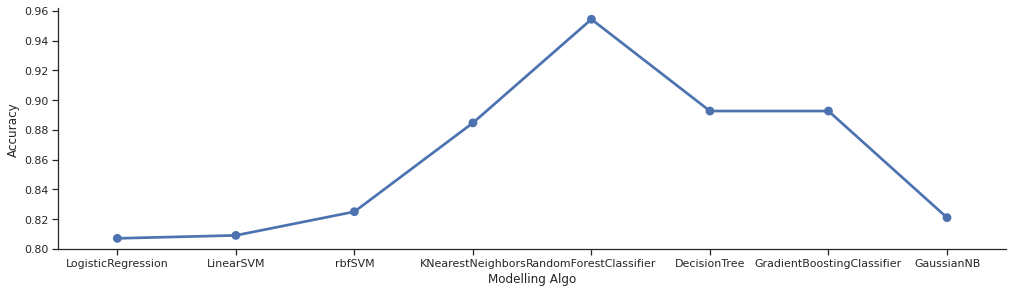

In [236]:
sns.factorplot(x='Modelling Algo',y='Accuracy',data=acc_frame,kind='point',size=4,aspect=3.5)

NOTE THAT THIS IS WITHOUT FEATURE SCALING. NOW SINCE FEATURES HAVE DIFFERENT SCALES LET US TRY TO DO FEATURE SCALING AND SEE THE IMPACT.

In [237]:
def func(X_train,X_test,y_train,y_test,name_scaler):
    models=[LogisticRegression(),LinearSVC(),SVC(kernel='rbf'),KNeighborsClassifier(),RandomForestClassifier(),
        DecisionTreeClassifier(),GradientBoostingClassifier(),GaussianNB()]
    acc_sc=[]
    for model in range(len(models)):
        clf=models[model]
        clf.fit(X_train,y_train)
        pred=clf.predict(X_test)
        acc_sc.append(accuracy_score(pred,y_test))
     
    acc_frame[name_scaler]=np.array(acc_sc)

In [238]:
scalers=[MinMaxScaler(),StandardScaler()]
names=['Acc_Min_Max_Scaler','Acc_Standard_Scaler']
for scale in range(len(scalers)):
    scaler=scalers[scale]
    scaler.fit(df)
    scaled_df=scaler.transform(df)
    X=scaled_df[:,0:11]
    Y=df['quality'].to_numpy()
    X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)
    func(X_train,X_test,y_train,y_test,names[scale])

In [239]:
acc_frame

Modelling Algo  ...  Acc_Standard_Scaler
0          LogisticRegression  ...               0.8775
1                   LinearSVM  ...               0.8825
2                      rbfSVM  ...               0.8900
3           KNearestNeighbors  ...               0.8950
4      RandomForestClassifier  ...               0.9100
5                DecisionTree  ...               0.8850
6  GradientBoostingClassifier  ...               0.8775
7                  GaussianNB  ...               0.8425

[8 rows x 4 columns]

NOW THIS CLEARLY SHOWS THE ACCUARCIES OF DIFFERENT MODELLING ALGOS ON USING DIFFERENT SCALERS.

1.Note that here the accuracies increase marginally on scaling.

2.Also for this data, StandardScaling seems to give slightly better results than the MinMaxScaling.

3.For some modelling algos there is a considerable increase in accuracies upon scaling the features like SVM, KNN wheras for others there isn't a considerable increase in accuracies upon scaling.

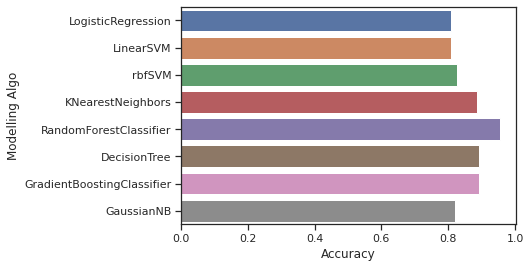

In [240]:
# just to visualize the accuracies.

sns.barplot(y='Modelling Algo',x='Accuracy',data=acc_frame)

**Observation** : Random Forest Classification has highest accuracy score

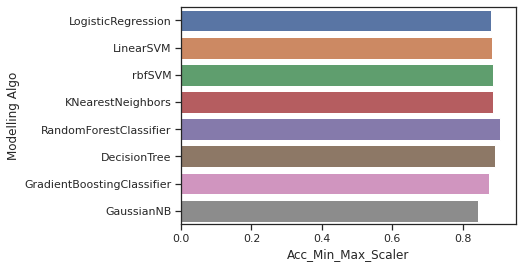

In [241]:
sns.barplot(y='Modelling Algo',x='Acc_Min_Max_Scaler',data=acc_frame)

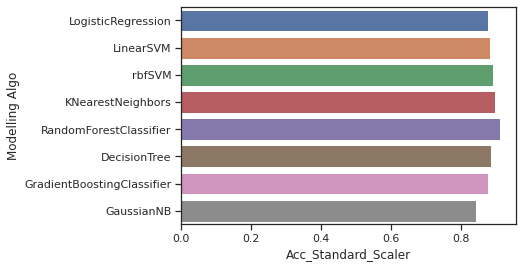

In [242]:
sns.barplot(y='Modelling Algo',x='Acc_Standard_Scaler',data=acc_frame)

In [243]:
# preparing the features by using a StandardScaler as it gave better resluts.
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df)
X=scaled_df[:,0:11]
Y=df['quality'].to_numpy()
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

### **Computing Cross Validation**

In [244]:
from sklearn.model_selection import cross_val_score

In [245]:
print("Logistic Regression :",cross_val_score(clf_lr,X_res,y_res,cv=5).mean())

Logistic Regression : 0.8146436124290115


In [246]:
print("KNeighbours Classifier :",cross_val_score(clf_knn,X_res,y_res,cv=5).mean())

KNeighbours Classifier : 0.9105035127878149


In [247]:
print("Random Forest Classifier",cross_val_score(clf_rf,X_res,y_res,cv=5).mean())

Random Forest Classifier 0.9136836352403508


In [248]:
print("Gradient Boosting :",cross_val_score(clf_gb,X_res,y_res,cv=5).mean())

Gradient Boosting : 0.9073281426975992


In [249]:
print("Decision Tree Classifier :",cross_val_score(clf_dt,X_res,y_res,cv=5).mean())

Decision Tree Classifier : 0.8607763775910275


# **HYPER PARAMETER TUNING**

In [250]:
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

**1.Logistic Regression**

In [251]:
params_dict={'C':[0.001, 0.01, 0.1, 1, 10, 100, 1000],'penalty':['l1','l2']}
clf_lr=GridSearchCV(estimator=LogisticRegression(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_lr.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [252]:
clf_lr.best_params_

{'C': 0.1, 'penalty': 'l2'}

In [253]:
clf_lr.best_score_ # the best accuracy obtained by Grid search on the train set.

0.8815826330532213

In [254]:
pred=clf_lr.predict(X_test)
accuracy_score(pred,y_test)

0.8825

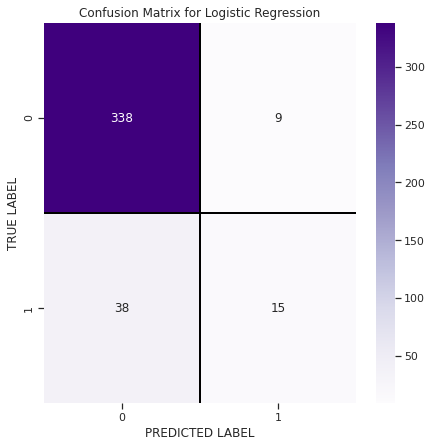

In [255]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
x_axis_labels = ["Not-Good(0)","Good(1)"]
y_axis_labels = ["Not-Good(0)","Good(1)"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples") #xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Logistic Regression')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

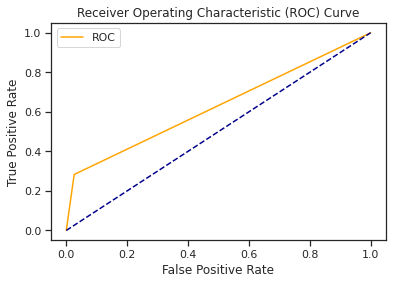

In [256]:
#plotting roc-auc curve

from sklearn.metrics import roc_curve
from sklearn.metrics import auc

fpr, tpr, thresholds = roc_curve(y_test, pred)
plot_roc_curve(fpr, tpr)

## **2.KNeighbours Classifier**

In [257]:
l=[i+1 for i in range(50)]
params_dict={'n_neighbors':l,'n_jobs':[-1]}
clf_knn=GridSearchCV(estimator=KNeighborsClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_knn.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_jobs': [-1],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [258]:
clf_knn.best_score_

0.8807422969187675

In [259]:
clf_knn.best_params_

{'n_jobs': -1, 'n_neighbors': 1}

In [260]:
pred=clf_knn.predict(X_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test setX

0.89

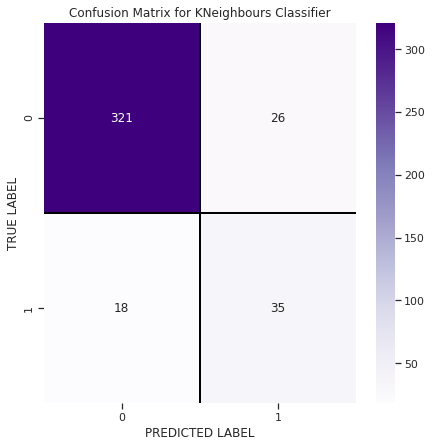

In [261]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
x_axis_labels = ["Not-Good(0)","Good(1)"]
y_axis_labels = ["Not-Good(0)","Good(1)"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples") #xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for KNeighbours Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

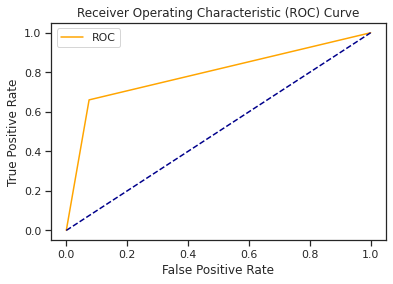

In [262]:
#Plotting ROC-AUC Curve

fpr, tpr, thresholds = roc_curve(y_test, pred)
plot_roc_curve(fpr, tpr)

### **3. RANDOM FOREST.**

In [263]:
params_dict={'n_estimators':[500],'max_features':['auto','sqrt','log2']}
clf_rf=GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1),param_grid=params_dict,scoring='accuracy',cv=10)
clf_rf.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=-1,
                                              oob_score=False,
                                              random

In [264]:
clf_rf.best_score_

0.9116036414565827

In [265]:
clf_rf.best_params_

{'max_features': 'sqrt', 'n_estimators': 500}

In [266]:
pred=clf_rf.predict(X_test)
accuracy_score(pred,y_test)   # actual accuarcy on our test set.

0.905

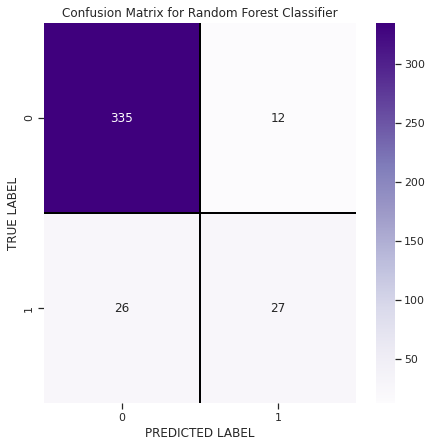

In [267]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
x_axis_labels = ["Not-Good(0)","Good(1)"]
y_axis_labels = ["Not-Good(0)","Good(1)"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples") #xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Random Forest Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

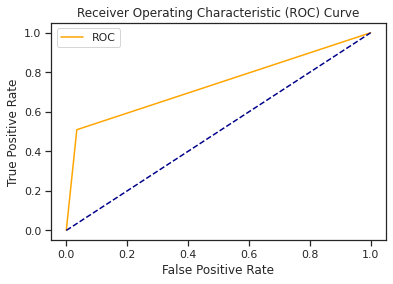

In [268]:
#Plotting ROC-AUC Curve

fpr, tpr, thresholds = roc_curve(y_test, pred)
plot_roc_curve(fpr, tpr)

### **4. GRADIENT BOOSTING.**

In [269]:
clf_gb=GridSearchCV(estimator=GradientBoostingClassifier(),cv=10,param_grid=dict({'n_estimators':[500]}))
clf_gb.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
        

In [270]:
clf_gb.best_score_

0.9099439775910364

In [271]:
clf_gb.best_params_

{'n_estimators': 500}

In [272]:
pred=clf_gb.predict(X_test)
accuracy_score(pred,y_test)

0.8875

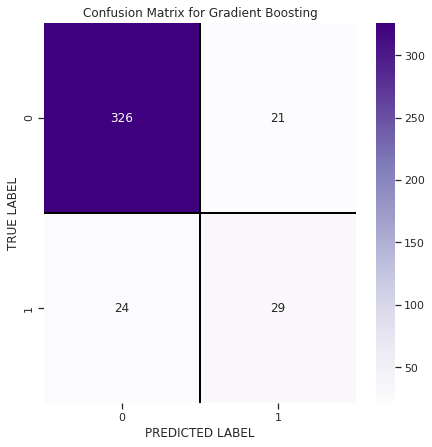

In [273]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
x_axis_labels = ["Not-Good(0)","Good(1)"]
y_axis_labels = ["Not-Good(0)","Good(1)"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples") #xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Gradient Boosting')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

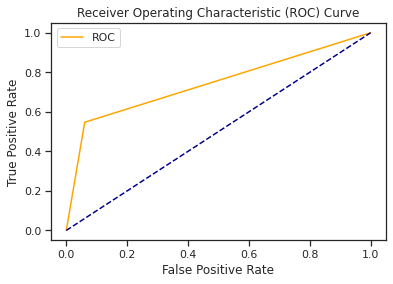

In [274]:
#Plotting AUC-ROC Curve

fpr, tpr, thresholds = roc_curve(y_test, pred)
plot_roc_curve(fpr, tpr)

### **5.DECISION TREE**

In [275]:
params_dict={'max_depth':np.arange(2,10),'criterion':['gini','entropy']}
clf_dt=GridSearchCV(estimator=DecisionTreeClassifier(),param_grid=params_dict,scoring='accuracy',cv=10)
clf_dt.fit(X_train,y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                  

In [276]:
clf_dt.best_score_

0.8841036414565826

In [277]:
clf_dt.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [278]:
pred=clf_gb.predict(X_test)
accuracy_score(pred,y_test)

0.8875

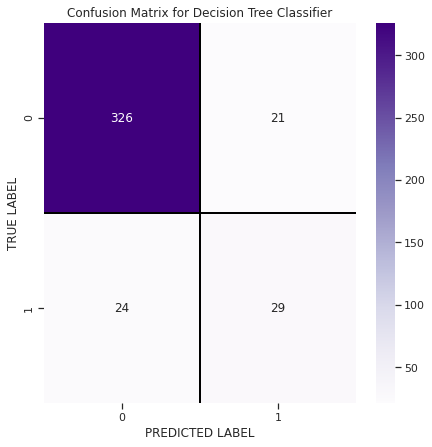

In [279]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, pred)
x_axis_labels = ["Not-Good(0)","Good(1)"]
y_axis_labels = ["Not-Good(0)","Good(1)"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, cmap="Purples") #xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
#plt.savefig("dtcm.png", format='png', dpi=500, bbox_inches='tight')
plt.show()

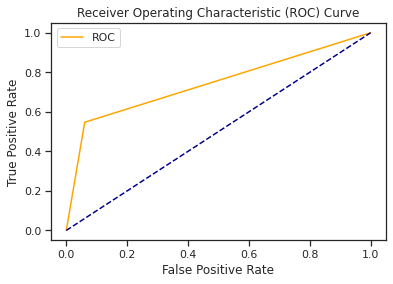

In [280]:
#Plotting ROC_AUC Curve

fpr, tpr, thresholds = roc_curve(y_test, pred)
plot_roc_curve(fpr, tpr)

HENCE ON GIVEN PARAMETER TUNING THE RANDOM FOREST CLASSIFIER  GIVES THE HIGHEST ACCURACY OF 90.5

## **FINALIZE THE BEST MODEL**

In [281]:
Final_mod = RandomForestClassifier(max_features = 'auto', n_estimators = 500)
Final_mod.fit(X_train,y_train)
pred=Final_mod.predict(X_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

90.5


## **PREDICTION**

In [282]:
# Printing predicted values
test=pd.DataFrame(data=y_test,)
test['Predicted values']=pred
test
# On the lest side values are those which are taken by machine for test...

0  Predicted values
0    0                 0
1    0                 0
2    0                 0
3    0                 0
4    0                 0
..  ..               ...
395  0                 0
396  0                 0
397  0                 0
398  0                 0
399  1                 0

[400 rows x 2 columns]

## **Saving Final Model**

In [283]:
# Dumping Data in pickle file.
import joblib
joblib.dump(pred,'Wine-quality.pkl')

['Wine-quality.pkl']

## Table of Contents

### [Preface](00.00-Preface.ipynb)

### [1. IPython: Beyond Normal Python](01.00-IPython-Beyond-Normal-Python.ipynb)
- [Help and Documentation in IPython](01.01-Help-And-Documentation.ipynb)
- [Keyboard Shortcuts in the IPython Shell](01.02-Shell-Keyboard-Shortcuts.ipynb)
- [IPython Magic Commands](01.03-Magic-Commands.ipynb)
- [Input and Output History](01.04-Input-Output-History.ipynb)
- [IPython and Shell Commands](01.05-IPython-And-Shell-Commands.ipynb)
- [Errors and Debugging](01.06-Errors-and-Debugging.ipynb)
- [Profiling and Timing Code](01.07-Timing-and-Profiling.ipynb)
- [More IPython Resources](01.08-More-IPython-Resources.ipynb)

### [2. Introduction to NumPy](02.00-Introduction-to-NumPy.ipynb)
- [Understanding Data Types in Python](02.01-Understanding-Data-Types.ipynb)
- [The Basics of NumPy Arrays](02.02-The-Basics-Of-NumPy-Arrays.ipynb)
- [Computation on NumPy Arrays: Universal Functions](02.03-Computation-on-arrays-ufuncs.ipynb)
- [Aggregations: Min, Max, and Everything In Between](02.04-Computation-on-arrays-aggregates.ipynb)
- [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb)
- [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb)
- [Fancy Indexing](02.07-Fancy-Indexing.ipynb)
- [Sorting Arrays](02.08-Sorting.ipynb)
- [Structured Data: NumPy's Structured Arrays](02.09-Structured-Data-NumPy.ipynb)

### [3. Data Manipulation with Pandas](03.00-Introduction-to-Pandas.ipynb)
- [Introducing Pandas Objects](03.01-Introducing-Pandas-Objects.ipynb)
- [Data Indexing and Selection](03.02-Data-Indexing-and-Selection.ipynb)
- [Operating on Data in Pandas](03.03-Operations-in-Pandas.ipynb)
- [Handling Missing Data](03.04-Missing-Values.ipynb)
- [Hierarchical Indexing](03.05-Hierarchical-Indexing.ipynb)
- [Combining Datasets: Concat and Append](03.06-Concat-And-Append.ipynb)
- [Combining Datasets: Merge and Join](03.07-Merge-and-Join.ipynb)
- [Aggregation and Grouping](03.08-Aggregation-and-Grouping.ipynb)
- [Pivot Tables](03.09-Pivot-Tables.ipynb)
- [Vectorized String Operations](03.10-Working-With-Strings.ipynb)
- [Working with Time Series](03.11-Working-with-Time-Series.ipynb)
- [High-Performance Pandas: eval() and query()](03.12-Performance-Eval-and-Query.ipynb)
- [Further Resources](03.13-Further-Resources.ipynb)

### [4. Visualization with Matplotlib](04.00-Introduction-To-Matplotlib.ipynb)
- [Simple Line Plots](04.01-Simple-Line-Plots.ipynb)
- [Simple Scatter Plots](04.02-Simple-Scatter-Plots.ipynb)
- [Visualizing Errors](04.03-Errorbars.ipynb)
- [Density and Contour Plots](04.04-Density-and-Contour-Plots.ipynb)
- [Histograms, Binnings, and Density](04.05-Histograms-and-Binnings.ipynb)
- [Customizing Plot Legends](04.06-Customizing-Legends.ipynb)
- [Customizing Colorbars](04.07-Customizing-Colorbars.ipynb)
- [Multiple Subplots](04.08-Multiple-Subplots.ipynb)
- [Text and Annotation](04.09-Text-and-Annotation.ipynb)
- [Customizing Ticks](04.10-Customizing-Ticks.ipynb)
- [Customizing Matplotlib: Configurations and Stylesheets](04.11-Settings-and-Stylesheets.ipynb)
- [Three-Dimensional Plotting in Matplotlib](04.12-Three-Dimensional-Plotting.ipynb)
- [Geographic Data with Basemap](04.13-Geographic-Data-With-Basemap.ipynb)
- [Visualization with Seaborn](04.14-Visualization-With-Seaborn.ipynb)
- [Further Resources](04.15-Further-Resources.ipynb)

### [5. Machine Learning](05.00-Machine-Learning.ipynb)
- [What Is Machine Learning?](05.01-What-Is-Machine-Learning.ipynb)
- [Introducing Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb)
- [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb)
- [Feature Engineering](05.04-Feature-Engineering.ipynb)
- [In Depth: Naive Bayes Classification](05.05-Naive-Bayes.ipynb)
- [In Depth: Linear Regression](05.06-Linear-Regression.ipynb)
- [In-Depth: Support Vector Machines](05.07-Support-Vector-Machines.ipynb)
- [In-Depth: Decision Trees and Random Forests](05.08-Random-Forests.ipynb)
- [In Depth: Principal Component Analysis](05.09-Principal-Component-Analysis.ipynb)
- [In-Depth: Manifold Learning](05.10-Manifold-Learning.ipynb)
- [In Depth: k-Means Clustering](05.11-K-Means.ipynb)
- [In Depth: Gaussian Mixture Models](05.12-Gaussian-Mixtures.ipynb)
- [In-Depth: Kernel Density Estimation](05.13-Kernel-Density-Estimation.ipynb)
- [Application: A Face Detection Pipeline](05.14-Image-Features.ipynb)
- [Further Machine Learning Resources](05.15-Learning-More.ipynb)

### [Appendix: Figure Code](06.00-Figure-Code.ipynb)